In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
import plotly.express as px
from scipy.stats import entropy


In [41]:
conda install -c conda-forge umap-learn


Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [43]:
from umap.umap_ import UMAP

In [660]:
path = r'C:\Users\jemcl\Desktop\College Notes\10. Spring 2023\CSCI 334\Final Project\Result.csv'
data = pd.read_csv(path)
data = data.replace(',','', regex=True)
data.iloc[:,4:10] = data.iloc[:,4:10].astype(float)
data

Unnamed: 0  FIPS Code State/Area  Year  Month  \
0               0          1    Alabama  1998    1.0   
1               1          1    Alabama  1998    2.0   
2               2          1    Alabama  1998    3.0   
3               3          1    Alabama  1998    4.0   
4               4          1    Alabama  1998    5.0   
...           ...        ...        ...   ...    ...   
15295       15295         56    Wyoming  2022    8.0   
15296       15296         56    Wyoming  2022    9.0   
15297       15297         56    Wyoming  2022   10.0   
15298       15298         56    Wyoming  2022   11.0   
15299       15299         56    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.

In [4]:
del data['FIPS Code']

In [5]:
newDat = data[data['State/Area'] == 'South Carolina']

In [6]:
newDat

Unnamed: 0      State/Area  Year  Month  \
480           480  South Carolina  1998    1.0   
481           481  South Carolina  1998    2.0   
482           482  South Carolina  1998    3.0   
483           483  South Carolina  1998    4.0   
484           484  South Carolina  1998    5.0   
...           ...             ...   ...    ...   
15175       15175  South Carolina  2022    8.0   
15176       15176  South Carolina  2022    9.0   
15177       15177  South Carolina  2022   10.0   
15178       15178  South Carolina  2022   11.0   
15179       15179  South Carolina  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
480                                            2924863.0           
481                                            2927841.0           
482                                            2931819.0           
483                                            2935797.0           
484                                            2939775.0           
...                                                  ...           
15175                                          4214924.0           
15176                                          4223242.0           
15177                                          4231566.0           
15178                                          4239410.0           
15179                                          4247118.0           

       Total Civilian Labor Force in State/Area  \
480                                   1919541.0   
481                                   1921953.0   
482                                   1925016.0   
483                                   1928531.0   
484                                   1932842.0   
...                                         ...   
15175                                 2374500.0   
15176                                 2372324.0   
15177                                 2371183.0   
15178                                 2371107.0   
15179                                 2371550.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
480                                      65.6                       1854351.0   
481                                      65.6                       1857603.0   
482                                      65.7                       1860558.0   
483                                      65.7                       1863316.0   
484                                      65.7                       1866196.0   
...                                       ...                             ...   
15175                                    56.3                       2296410.0   
15176                                    56.2                       2293917.0   
15177                                    56.0                       2293109.0   
15178                                    55.9                       2293650.0   
15179                                    55.8                       2294391.0   

       Percent (%) of Labor Force Employed in State/Area  \
480                                                 63.4   
481                                                 63.4   
482                                                 63.5   
483                                                 63.5   
484                                                 63.5   
...                                                  ...   
15175                                               54.5   
15176                                               54.3   
15177                                               54.2   
15178                                               54.1   
15179                                               54.0   

       Total Unemployment in State/Area  \
480                             65190.0   
481                             64350.0   
482                             64458.0   
483                             65215.0   
484                             66646.0   
...                     

In [7]:
newDat = ['Total Civilian Non-Institutional Population in State/Area', 'Percent (%) of Labor Force Unemployed in State/Area']
df = data.loc[:,newDat]
df.head()

Total Civilian Non-Institutional Population in State/Area  \
0                                          3328802.0           
1                                          3330604.0           
2                                          3333406.0           
3                                          3336208.0           
4                                          3339010.0           

   Percent (%) of Labor Force Unemployed in State/Area  
0                                                4.5    
1                                                4.4    
2                                                4.4    
3                                                4.4    
4                                                4.4

In [8]:
df['Total Civilian Non-Institutional Population in State/Area'] = df['Total Civilian Non-Institutional Population in State/Area'].astype(float)
df

Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Percent (%) of Labor Force Unemployed in State/Area  
0                                                    4.5    
1                                                    4.4    
2                                                    4.4    
3                                                    4.4    
4                                                    4.4    
...                                                  ...    
15295                                                3.7    
15296                                                3.8    
15297                                                3.9    
15298                                                3.9    
15299                                                3.9    

[15300 rows x 2 columns]

In [9]:
data[data.Year >= 1998]

Unnamed: 0 State/Area  Year  Month  \
0               0    Alabama  1998    1.0   
1               1    Alabama  1998    2.0   
2               2    Alabama  1998    3.0   
3               3    Alabama  1998    4.0   
4               4    Alabama  1998    5.0   
...           ...        ...   ...    ...   
15295       15295    Wyoming  2022    8.0   
15296       15296    Wyoming  2022    9.0   
15297       15297    Wyoming  2022   10.0   
15298       15298    Wyoming  2022   11.0   
15299       15299    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
15295                           10840.0  

In [667]:
data

FIPS Code State/Area  Year  Month  \
0              1    Alabama  1998    1.0   
1              1    Alabama  1998    2.0   
2              1    Alabama  1998    3.0   
3              1    Alabama  1998    4.0   
4              1    Alabama  1998    5.0   
...          ...        ...   ...    ...   
15295         56    Wyoming  2022    8.0   
15296         56    Wyoming  2022    9.0   
15297         56    Wyoming  2022   10.0   
15298         56    Wyoming  2022   11.0   
15299         56    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
15295                           10840.0   
15296     

In [668]:
path2 = r'C:\Users\jemcl\Desktop\College Notes\10. Spring 2023\CSCI 334\Final Project\Yearly Percent Change by State.csv'
pChange = pd.read_csv(path2)

In [671]:
pChange = pChange[pChange.Year >= 1998]
del pChange['Unnamed: 0']
pChange

State/Area  Year  Percent Unemployment Average  Percent Change
1166        Alabama  1998                          4.46           -0.47
1167         Alaska  1998                          6.32           -0.61
1168        Arizona  1998                          4.27           -0.35
1169       Arkansas  1998                          5.05           -0.06
1170     California  1998                          5.93           -0.48
...             ...   ...                           ...             ...
2486       Virginia  2022                          2.83           -1.05
2487     Washington  2022                          4.18           -1.03
2488  West Virginia  2022                          3.92           -1.19
2489      Wisconsin  2022                          2.93           -0.91
2490        Wyoming  2022                          3.57           -1.05

[1325 rows x 4 columns]

In [675]:
data = data.merge(pChange)
data

FIPS Code State/Area  Year  Month  \
0              1    Alabama  1998    1.0   
1              1    Alabama  1998    2.0   
2              1    Alabama  1998    3.0   
3              1    Alabama  1998    4.0   
4              1    Alabama  1998    5.0   
...          ...        ...   ...    ...   
15295         56    Wyoming  2022    8.0   
15296         56    Wyoming  2022    9.0   
15297         56    Wyoming  2022   10.0   
15298         56    Wyoming  2022   11.0   
15299         56    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
15295                           10840.0   
15296     

In [721]:
data[data['State/Area'] == 'Alabama']

FIPS Code State/Area  Year  Month  \
0              1    Alabama  1998    1.0   
1              1    Alabama  1998    2.0   
2              1    Alabama  1998    3.0   
3              1    Alabama  1998    4.0   
4              1    Alabama  1998    5.0   
...          ...        ...   ...    ...   
14695          1    Alabama  2022    8.0   
14696          1    Alabama  2022    9.0   
14697          1    Alabama  2022   10.0   
14698          1    Alabama  2022   11.0   
14699          1    Alabama  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
14695                                          4017088.0           
14696                                          4020201.0           
14697                                          4023265.0           
14698                                          4025888.0           
14699                                          4028389.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
14695                                 2286594.0   
14696                                 2284341.0   
14697                                 2283211.0   
14698                                 2283339.0   
14699                                 2283890.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
14695                                    56.9                       2226394.0   
14696                                    56.8                       2223853.0   
14697                                    56.8                       2222768.0   
14698                                    56.7                       2223170.0   
14699                                    56.7                       2223904.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
14695                                               55.4   
14696                                               55.3   
14697                                               55.2   
14698                                               55.2   
14699                                               55.2   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
14695                           60200.0   
14696     

In [686]:
path2 = r'C:\Users\jemcl\Desktop\College Notes\10. Spring 2023\CSCI 334\Final Project\Minimum Wage Data.csv'
wage = pd.read_csv(path2,encoding='cp1252')
wageDat = wage[['State','Year','Effective.Minimum.Wage.2020.Dollars']]
wageDat = wageDat.rename(columns={'State':'State/Area'})

In [692]:
wageDat

State/Area  Year  Effective.Minimum.Wage.2020.Dollars
0           Alabama  1968                                 8.55
1            Alaska  1968                                15.61
2           Arizona  1968                                 8.55
3          Arkansas  1968                                 8.55
4        California  1968                                12.26
...             ...   ...                                  ...
2857       Virginia  2020                                 7.25
2858     Washington  2020                                13.50
2859  West Virginia  2020                                 8.75
2860      Wisconsin  2020                                 7.25
2861        Wyoming  2020                                 7.25

[2862 rows x 3 columns]

In [719]:
test

FIPS Code State/Area  Year  Month  \
0              1    Alabama  1998    1.0   
1              1    Alabama  1998    2.0   
2              1    Alabama  1998    3.0   
3              1    Alabama  1998    4.0   
4              1    Alabama  1998    5.0   
...          ...        ...   ...    ...   
14071         56    Wyoming  2020    8.0   
14072         56    Wyoming  2020    9.0   
14073         56    Wyoming  2020   10.0   
14074         56    Wyoming  2020   11.0   
14075         56    Wyoming  2020   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
14071                                           451127.0           
14072                                           451474.0           
14073                                           451850.0           
14074                                           452195.0           
14075                                           452401.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
14071                                  293495.0   
14072                                  293324.0   
14073                                  292624.0   
14074                                  292079.0   
14075                                  291617.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
14071                                    65.1                        275244.0   
14072                                    65.0                        276031.0   
14073                                    64.8                        276292.0   
14074                                    64.6                        276149.0   
14075                                    64.5                        275785.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
14071                                               61.0   
14072                                               61.1   
14073                                               61.1   
14074                                               61.1   
14075                                               61.0   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
14071                           18251.0   
14072     

In [730]:
data = data.merge(wageDat)
data = data.rename(columns={'Effective.Minimum.Wage.2020.Dollars' : 'Minimum Wage (2020 Dollars)'})
data

FIPS Code State/Area  Year  Month  \
0              1    Alabama  1998    1.0   
1              1    Alabama  1998    2.0   
2              1    Alabama  1998    3.0   
3              1    Alabama  1998    4.0   
4              1    Alabama  1998    5.0   
...          ...        ...   ...    ...   
14071         56    Wyoming  2020    8.0   
14072         56    Wyoming  2020    9.0   
14073         56    Wyoming  2020   10.0   
14074         56    Wyoming  2020   11.0   
14075         56    Wyoming  2020   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
14071                                           451127.0           
14072                                           451474.0           
14073                                           451850.0           
14074                                           452195.0           
14075                                           452401.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
14071                                  293495.0   
14072                                  293324.0   
14073                                  292624.0   
14074                                  292079.0   
14075                                  291617.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
14071                                    65.1                        275244.0   
14072                                    65.0                        276031.0   
14073                                    64.8                        276292.0   
14074                                    64.6                        276149.0   
14075                                    64.5                        275785.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
14071                                               61.0   
14072                                               61.1   
14073                                               61.1   
14074                                               61.1   
14075                                               61.0   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
14071                           18251.0   
14072     

In [724]:
#new = r'C:\Users\jemcl\Desktop\College Notes\10. Spring 2023\CSCI 334\Final Project\Delete This.csv'

#test.to_csv(new)

In [922]:
pathC = r'C:\Users\jemcl\Desktop\College Notes\10. Spring 2023\CSCI 334\Final Project\Result with Clusters.csv'
data.to_csv(pathC)

In [10]:
from sklearn.cluster import KMeans

In [732]:
# indexing out numerical variables
df = data.iloc[:,4:17]
df

Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
14071                                           451127.0           
14072                                           451474.0           
14073                                           451850.0           
14074                                           452195.0           
14075                                           452401.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
14071                                  293495.0   
14072                                  293324.0   
14073                                  292624.0   
14074                                  292079.0   
14075                                  291617.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
14071                                    65.1                        275244.0   
14072                                    65.0                        276031.0   
14073                                    64.8                        276292.0   
14074                                    64.6                        276149.0   
14075                                    64.5                        275785.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
14071                                               61.0   
14072                                               61.1   
14073                                               61.1   
14074                                               61.1   
14075                                               61.0   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
14071                           18251.0   
14072                           17293.0   
14073                           16332.0   
14074                           15930.0   
14075                           15832.0   

       Percent (%) of Labor Force Unemployed in State/Area  \
0                                                    4.5     
1                                                    4.4     
2                                                    4.4     
3                                                    4.4     
4                                                    4.4

In [740]:
km.fit(df)

KMeans(n_clusters=5)

In [742]:
# predict the labels of clusters.
label = km.fit_predict(df)
 
print(label)
print(np.unique(label))

[0 0 0 ... 2 2 2]
[0 1 2 3 4]


In [743]:
label.shape, df.shape

((14076,), (14076, 13))

In [744]:
# lets take a check
df.iloc[label == 0, 0]

0        3328802.0
1        3330604.0
2        3333406.0
3        3336208.0
4        3339010.0
           ...    
14059    4710426.0
14060    4711491.0
14061    4712739.0
14062    4713406.0
14063    4713321.0
Name: Total Civilian Non-Institutional Population in State/Area, Length: 4592, dtype: float64

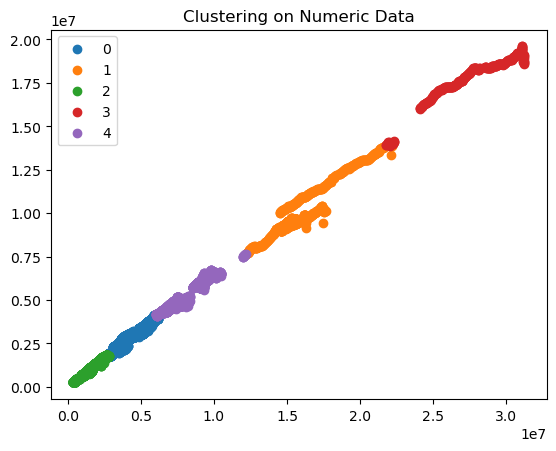

In [745]:
# getting unique labels
 
u_labels = np.unique(label)
#df['label'] = label
# plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.legend()
plt.title('Clustering on Numeric Data')
plt.show()

In [746]:
km.cluster_centers_

array([[4.19110656e+06, 2.74558599e+06, 6.53745098e+01, 2.59397971e+06,
        6.17381917e+01, 1.51606272e+05, 5.59694989e+00, 4.05914590e+04,
        1.96781058e+05, 2.55455487e+05, 5.59659477e+00, 1.18313725e-01,
        8.30339434e+00],
       [1.60574470e+07, 1.01334869e+07, 6.30575000e+01, 9.55150075e+06,
        5.94453750e+01, 5.81986194e+05, 5.73837500e+00, 4.26539837e+04,
        7.89637694e+05, 1.06665361e+06, 5.72365000e+00, 9.85750000e-02,
        8.19256250e+00],
       [1.27945437e+06, 8.40921564e+05, 6.65618105e+01, 7.98161807e+05,
        6.32161716e+01, 4.27597573e+04, 5.07807638e+00, 3.96071275e+04,
        5.68371954e+04, 7.51421328e+04, 5.07801037e+00, 9.56372780e-02,
        8.21175232e+00],
       [2.77577269e+07, 1.78329822e+07, 6.43719178e+01, 1.65839031e+07,
        5.99003425e+01, 1.24907905e+06, 6.96198630e+00, 4.60277705e+04,
        1.46928364e+06, 2.00039623e+06, 7.00082192e+00, 2.76095890e-01,
        9.54859589e+00],
       [8.17659613e+06, 5.29624821e+

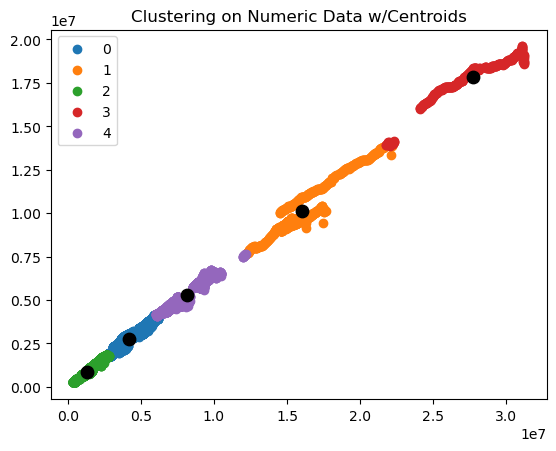

In [747]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('Clustering on Numeric Data w/Centroids')
plt.show()

In [748]:
km.inertia_ ## what is this

2.8789212430477936e+16

In [749]:
ks = [i for i in range(3,12)]
ks

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [750]:
inertias = []
for i in ks:
    km = KMeans(n_clusters=i)
    km.fit(df[df.columns[:11]])
    km.fit_predict(df[df.columns[:11]])
    inertias.append(km.inertia_)

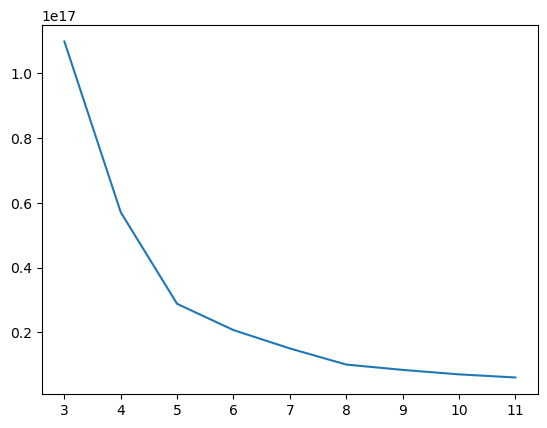

In [751]:
plt.plot(ks, inertias)

In [752]:
# data['Unemployment Category']
np.unique(label)

array([0, 1, 2, 3, 4])

[3 3 3 ... 0 0 0]
[0 1 2 3 4]


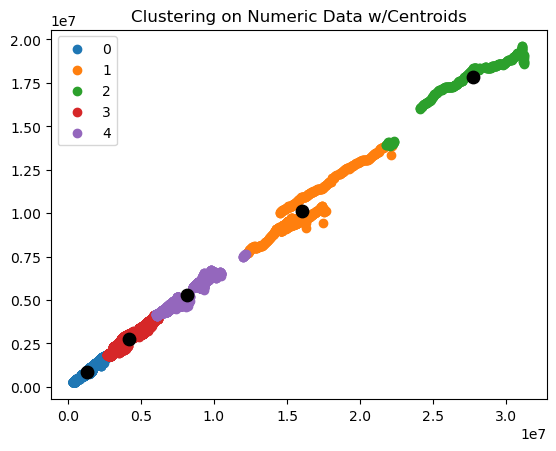

In [753]:
km = KMeans(n_clusters=5)
km.fit(df)

# predict the labels of clusters.
label = km.fit_predict(df)
 
print(label)
print(np.unique(label))
# getting unique labels
 
u_labels = np.unique(label)
#df['label'] = label
# plotting the results:


#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('Clustering on Numeric Data w/Centroids')
plt.show()

In [754]:
labelDf = pd.DataFrame(label)
newDat = data.assign(Cluster = label)

In [755]:
a=1
b=2
c=4
d=0
e=3
print('Average Unemployment',newDat[newDat.Cluster==a]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==a]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==b]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==b]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==c]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==c]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==d]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==d]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==e]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==e]['State GDP'].mean())


Average Unemployment 5.738375000000008
State GDP 1066653.6144999976

Average Unemployment 6.961986301369861
State GDP 2000396.228767121

Average Unemployment 6.185721319547008
State GDP 507070.84638108994

Average Unemployment 5.078331238214959
State GDP 75153.36643620254

Average Unemployment 5.596709522771846
State GDP 255479.20091522968


In [ ]:
# newDat[newDat.Cluster==1]['State/Area'].unique()
#newDat[newDat.Cluster==1]

In [118]:
#maxNum = df['Percent (%) of Labor Force Unemployed in State/Area'].max()
#minNum = df['Percent (%) of Labor Force Unemployed in State/Area'].min()
print(maxNum)
minNum

1.9

In [261]:
del data['Unemployment Category']

In [367]:
print((low + catRange*3))
print(minNum + (catRange*4))

6.4
7.1


In [756]:
# Construting categories for the 4 clusters
cats = []
high = 9
low = 2.5
numRange =  high - low
#print(numRange)
catRange = numRange/5

for x in range(df.shape[0]):
    unemp = df.loc[x,'Percent (%) of Labor Force Unemployed in State/Area']
    #print(unemp)
    if unemp <= (low + catRange):
        cats.append('Very Low Unemployment')
    elif (unemp > (low + catRange) and (unemp <= (low + (catRange*2))) ) :
        cats.append('Low Unemployment')
    elif (unemp > (low + (catRange*2)) and (unemp <= (low + (catRange*3))) ):
        cats.append('Average Unemployment')
    elif (unemp > (low + (catRange*3)) and (unemp <= (low + (catRange*4))) ):
        #print(x)
        cats.append('High Unemployment')
    else:
        #print(x)
        cats.append('Very High Unemployment')
        
data.insert(11,'Unemployment Category', cats)

In [757]:
data[data['Unemployment Category'] == 'Low Unemployment'].shape[0]

4270

In [758]:
data[data['State/Area']=='Wyoming']

FIPS Code State/Area  Year  Month  \
600           56    Wyoming  1998    1.0   
601           56    Wyoming  1998    2.0   
602           56    Wyoming  1998    3.0   
603           56    Wyoming  1998    4.0   
604           56    Wyoming  1998    5.0   
...          ...        ...   ...    ...   
14071         56    Wyoming  2020    8.0   
14072         56    Wyoming  2020    9.0   
14073         56    Wyoming  2020   10.0   
14074         56    Wyoming  2020   11.0   
14075         56    Wyoming  2020   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
600                                             366083.0           
601                                             366105.0           
602                                             366126.0           
603                                             366148.0           
604                                             366169.0           
...                                                  ...           
14071                                           451127.0           
14072                                           451474.0           
14073                                           451850.0           
14074                                           452195.0           
14075                                           452401.0           

       Total Civilian Labor Force in State/Area  \
600                                    257656.0   
601                                    258232.0   
602                                    258807.0   
603                                    259339.0   
604                                    259827.0   
...                                         ...   
14071                                  293495.0   
14072                                  293324.0   
14073                                  292624.0   
14074                                  292079.0   
14075                                  291617.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
600                                      70.4                        245928.0   
601                                      70.5                        246331.0   
602                                      70.7                        246729.0   
603                                      70.8                        247102.0   
604                                      71.0                        247451.0   
...                                       ...                             ...   
14071                                    65.1                        275244.0   
14072                                    65.0                        276031.0   
14073                                    64.8                        276292.0   
14074                                    64.6                        276149.0   
14075                                    64.5                        275785.0   

       Percent (%) of Labor Force Employed in State/Area  \
600                                                 67.2   
601                                                 67.3   
602                                                 67.4   
603                                                 67.5   
604                                                 67.6   
...                                                  ...   
14071                                               61.0   
14072                                               61.1   
14073                                               61.1   
14074                                               61.1   
14075                                               61.0   

       Total Unemployment in State/Area  \
600                             11728.0   
601                             11901.0   
602                             12078.0   
603                             12237.0   
604                             12376.0   
...                                 ...   
14071                           18251.0   
14072     

In [759]:
# running PCA and clustering on that
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = df
X = scaler.fit_transform(X)
pca = PCA(n_components=3)
#dfx_pca = pca.fit(X)
pca_result = pca.fit_transform(X)

In [760]:
pca_result

array([[-1.05151171, -0.2077783 , -1.30724093],
       [-1.05719929, -0.22159459, -1.31565631],
       [-1.05788189, -0.22165555, -1.31561817],
       ...,
       [-1.40340926,  1.24555291,  1.32178789],
       [-1.40491512,  1.24042545,  1.30650488],
       [-1.40563982,  1.23654994,  1.29285936]])

C:\Users\jemcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



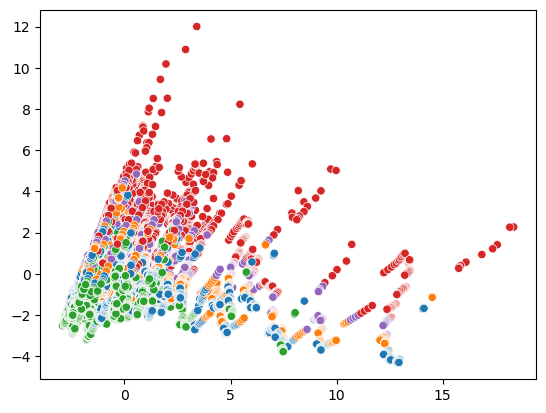

In [761]:
sns.scatterplot(pca_result[:, 0], pca_result[:, 1], hue=data['Unemployment Category']
                , legend=False)
plt.show()

In [762]:
fig = px.scatter_3d(
    pca_result, x=0, y=1, z=2,
    color=data['Unemployment Category']
, labels=data['Unemployment Category']

)
fig.update_traces(marker_size=8)
fig.show()

In [763]:
# Trying tSNE
tsne = TSNE(3)
tsne_result = tsne.fit_transform(df)

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



C:\Users\jemcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



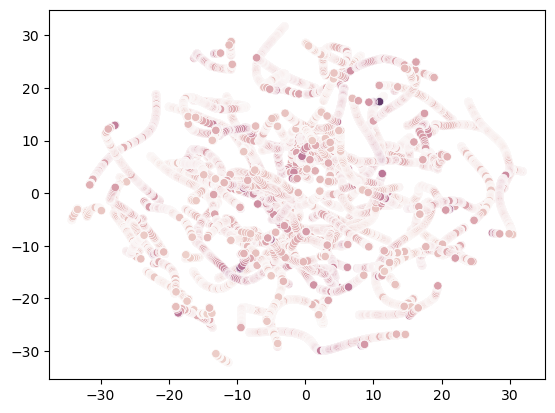

In [764]:
sns.scatterplot(tsne_result[:, 0], tsne_result[:, 1], hue=data['Percent (%) of Labor Force Unemployed in State/Area'], legend=False)
plt.show()

In [770]:
tsne3 = TSNE(n_components=3, random_state=0)
tsne3 = tsne.fit_transform(df)

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [771]:
tsne3

array([[ -7.8591757 ,  12.833416  ,  -0.1988329 ],
       [ -7.8377066 ,  12.835085  ,  -0.20718224],
       [ -7.791498  ,  12.846131  ,  -0.22185363],
       ...,
       [  2.482209  , -30.508848  , -17.438612  ],
       [  2.480527  , -30.508373  , -17.439293  ],
       [  2.4767537 , -30.511316  , -17.422832  ]], dtype=float32)

In [772]:
fig = px.scatter_3d(
    tsne3, x=0, y=1, z=2,
    color=data['Unemployment Category'], labels=data['Unemployment Category']
)
fig.update_traces(marker_size=8)
fig.show()

In [773]:
# plotting inertia
pca_df = pd.DataFrame(pca_result)
tsne_df = pd.DataFrame(tsne_result)


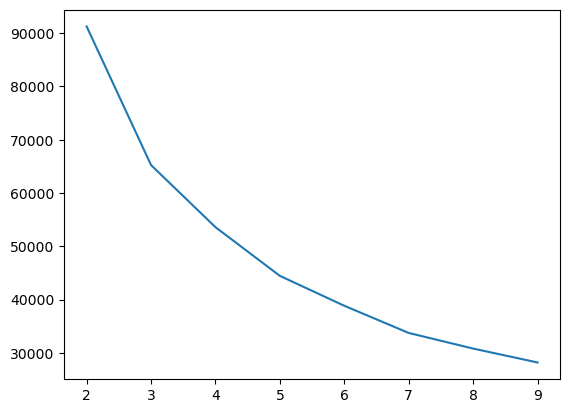

In [774]:
inertias = []
ks = [2,3,4,5,6,7,8,9]
for i in ks:
    km = KMeans(n_clusters=i)
    #km = KMeans(n_clusters=5)
    km.fit(pca_result)
    clusters = km.fit_predict(pca_result)
    #print('GOT HERE')
    inertias.append(km.inertia_)
    
plt.plot(ks, inertias)

In [775]:
# K-Means on PCA and tSNE
# PCA K Means
km = KMeans(n_clusters=5)
km.fit(pca_result)
pclusters = km.fit_predict(pca_result)

pca_df['cluster'] = pclusters

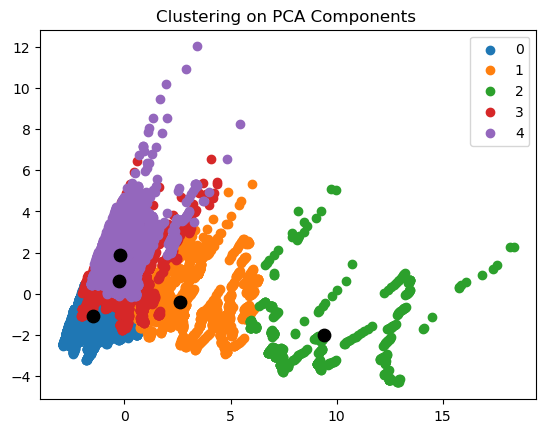

In [776]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(pclusters)


#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_df.iloc[pclusters == i , 0] , pca_df.iloc[pclusters == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('Clustering on PCA Components ')
plt.show()

In [777]:
u_labels

array([0, 1, 2, 3, 4])

In [778]:
# K Means on tSNE
km = KMeans(n_clusters=5)
km.fit(tsne_result)
tclusters = km.fit_predict(tsne_result)

tsne_df['cluster'] = tclusters

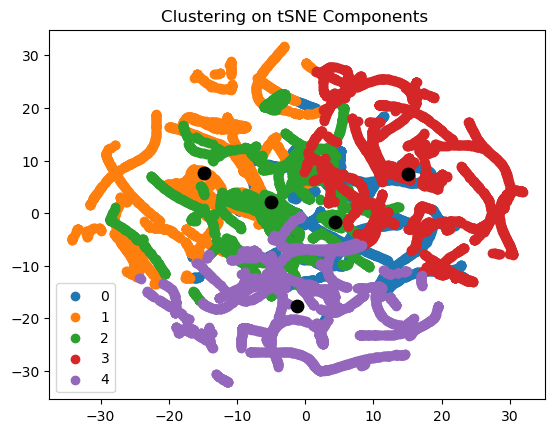

In [779]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(tclusters)

#plotting the results:
 
for i in u_labels:
    plt.scatter(tsne_df.iloc[tclusters == i , 0] , tsne_df.iloc[tclusters == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title('Clustering on tSNE Components ')
plt.legend()
plt.show()

In [780]:
# Moving on to UMAP
reducer = UMAP()

In [781]:
umap_result = reducer.fit_transform(df)

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [784]:
km = KMeans(n_clusters=5)
km.fit(umap_result)
uclusters = km.fit_predict(umap_result)
umap_df = pd.DataFrame(umap_result)

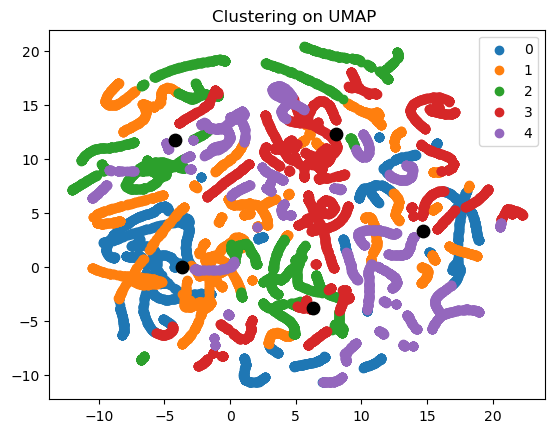

In [785]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(uclusters)

#plotting the results:
 
for i in u_labels:
    plt.scatter(umap_df.iloc[tclusters == i , 0] , umap_df.iloc[tclusters == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title('Clustering on UMAP ')
plt.legend()
plt.show()

In [786]:
umap_df['cluster'] = uclusters

# Comparing Reduction Models

In [787]:
compare = data[['State/Area','Month','Year', 'Percent (%) of Labor Force Unemployed in State/Area', 'State GDP', 'Unemployment Category']]

In [788]:
compare['pca'] = pca_df['cluster']
compare['tsne'] = tsne_df['cluster']
compare['umap'] = umap_df['cluster']

C:\Users\jemcl\AppData\Local\Temp\ipykernel_9972\3313947952.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jemcl\AppData\Local\Temp\ipykernel_9972\3313947952.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jemcl\AppData\Local\Temp\ipykernel_9972\3313947952.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [789]:
data[data['State/Area']=='Wyoming']

FIPS Code State/Area  Year  Month  \
600           56    Wyoming  1998    1.0   
601           56    Wyoming  1998    2.0   
602           56    Wyoming  1998    3.0   
603           56    Wyoming  1998    4.0   
604           56    Wyoming  1998    5.0   
...          ...        ...   ...    ...   
14071         56    Wyoming  2020    8.0   
14072         56    Wyoming  2020    9.0   
14073         56    Wyoming  2020   10.0   
14074         56    Wyoming  2020   11.0   
14075         56    Wyoming  2020   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
600                                             366083.0           
601                                             366105.0           
602                                             366126.0           
603                                             366148.0           
604                                             366169.0           
...                                                  ...           
14071                                           451127.0           
14072                                           451474.0           
14073                                           451850.0           
14074                                           452195.0           
14075                                           452401.0           

       Total Civilian Labor Force in State/Area  \
600                                    257656.0   
601                                    258232.0   
602                                    258807.0   
603                                    259339.0   
604                                    259827.0   
...                                         ...   
14071                                  293495.0   
14072                                  293324.0   
14073                                  292624.0   
14074                                  292079.0   
14075                                  291617.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
600                                      70.4                        245928.0   
601                                      70.5                        246331.0   
602                                      70.7                        246729.0   
603                                      70.8                        247102.0   
604                                      71.0                        247451.0   
...                                       ...                             ...   
14071                                    65.1                        275244.0   
14072                                    65.0                        276031.0   
14073                                    64.8                        276292.0   
14074                                    64.6                        276149.0   
14075                                    64.5                        275785.0   

       Percent (%) of Labor Force Employed in State/Area  \
600                                                 67.2   
601                                                 67.3   
602                                                 67.4   
603                                                 67.5   
604                                                 67.6   
...                                                  ...   
14071                                               61.0   
14072                                               61.1   
14073                                               61.1   
14074                                               61.1   
14075                                               61.0   

       Total Unemployment in State/Area  \
600                             11728.0   
601                             11901.0   
602                             12078.0   
603                             12237.0   
604                             12376.0   
...                                 ...   
14071                           18251.0   
14072     

In [790]:
compare[compare['State/Area']=='Wyoming']

State/Area  Month  Year  \
600      Wyoming    1.0  1998   
601      Wyoming    2.0  1998   
602      Wyoming    3.0  1998   
603      Wyoming    4.0  1998   
604      Wyoming    5.0  1998   
...          ...    ...   ...   
14071    Wyoming    8.0  2020   
14072    Wyoming    9.0  2020   
14073    Wyoming   10.0  2020   
14074    Wyoming   11.0  2020   
14075    Wyoming   12.0  2020   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
600                                                  4.6      14840.2   
601                                                  4.6      14840.2   
602                                                  4.7      14840.2   
603                                                  4.7      14840.2   
604                                                  4.8      14840.2   
...                                                  ...          ...   
14071                                                6.2      36330.4   
14072                                                5.9      36330.4   
14073                                                5.6      36330.4   
14074                                                5.5      36330.4   
14075                                                5.4      36330.4   

      Unemployment Category  pca  tsne  umap  
600        Low Unemployment    0     3     1  
601        Low Unemployment    0     3     1  
602        Low Unemployment    0     3     1  
603        Low Unemployment    0     3     1  
604        Low Unemployment    0     3     1  
...                     ...  ...   ...   ...  
14071  Average Unemployment    3     4     1  
14072  Average Unemployment    3     4     1  
14073  Average Unemployment    3     4     1  
14074  Average Unemployment    3     4     1  
14075  Average Unemployment    3     4     1  

[276 rows x 9 columns]

In [791]:
compare[compare['State/Area']=='California']

State/Area  Month  Year  \
48     California    1.0  1998   
49     California    2.0  1998   
50     California    3.0  1998   
51     California    4.0  1998   
52     California    5.0  1998   
...           ...    ...   ...   
13519  California    8.0  2020   
13520  California    9.0  2020   
13521  California   10.0  2020   
13522  California   11.0  2020   
13523  California   12.0  2020   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
48                                                   6.0    1147520.4   
49                                                   6.0    1147520.4   
50                                                   6.0    1147520.4   
51                                                   6.0    1147520.4   
52                                                   5.9    1147520.4   
...                                                  ...          ...   
13519                                               11.9    3020173.4   
13520                                               10.0    3020173.4   
13521                                                9.3    3020173.4   
13522                                                9.1    3020173.4   
13523                                                9.1    3020173.4   

        Unemployment Category  pca  tsne  umap  
48       Average Unemployment    2     4     0  
49       Average Unemployment    2     4     0  
50       Average Unemployment    2     4     0  
51       Average Unemployment    2     4     0  
52       Average Unemployment    2     4     0  
...                       ...  ...   ...   ...  
13519  Very High Unemployment    2     4     0  
13520  Very High Unemployment    2     4     0  
13521  Very High Unemployment    2     4     0  
13522  Very High Unemployment    2     4     0  
13523  Very High Unemployment    2     4     0  

[276 rows x 9 columns]

In [792]:
analysis = compare[compare['pca'] != compare['tsne']]

In [793]:
analysis

State/Area  Month  Year  \
0        Alabama    1.0  1998   
1        Alabama    2.0  1998   
2        Alabama    3.0  1998   
3        Alabama    4.0  1998   
4        Alabama    5.0  1998   
...          ...    ...   ...   
14071    Wyoming    8.0  2020   
14072    Wyoming    9.0  2020   
14073    Wyoming   10.0  2020   
14074    Wyoming   11.0  2020   
14075    Wyoming   12.0  2020   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
0                                                    4.5     110212.0   
1                                                    4.4     110212.0   
2                                                    4.4     110212.0   
3                                                    4.4     110212.0   
4                                                    4.4     110212.0   
...                                                  ...          ...   
14071                                                6.2      36330.4   
14072                                                5.9      36330.4   
14073                                                5.6      36330.4   
14074                                                5.5      36330.4   
14075                                                5.4      36330.4   

      Unemployment Category  pca  tsne  umap  
0          Low Unemployment    0     2     3  
1          Low Unemployment    0     2     3  
2          Low Unemployment    0     2     3  
3          Low Unemployment    0     2     3  
4          Low Unemployment    0     2     3  
...                     ...  ...   ...   ...  
14071  Average Unemployment    3     4     1  
14072  Average Unemployment    3     4     1  
14073  Average Unemployment    3     4     1  
14074  Average Unemployment    3     4     1  
14075  Average Unemployment    3     4     1  

[11445 rows x 9 columns]

In [275]:
compare.groupby(['tsne', 'pca']).size()

tsne  pca
0     0       324
      1       948
      2      2048
      3        36
1     0      1099
      1       603
      2      2429
      3        85
2     0      1283
      1      1434
      2       895
      3       249
3     0       334
      1      1768
      2      1450
      3       315
dtype: int64

In [276]:
compare.groupby('pca').count()

State/Area  Month  Year  \
pca                            
0          3040   3040  3040   
1          4753   4753  4753   
2          6822   6822  6822   
3           685    685   685   

     Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
pca                                                                   
0                                                 3040         3040   
1                                                 4753         4753   
2                                                 6822         6822   
3                                                  685          685   

     Unemployment Category  tsne  umap  
pca                                     
0                     3040  3040  3040  
1                     4753  4753  4753  
2                     6822  6822  6822  
3                      685   685   685

In [278]:
compare.groupby(['Unemployment Category', 'tsne']).size()

Unemployment Category   tsne
Average Unemployment    0        500
                        1        790
                        2        915
                        3        990
High Unemployment       0        342
                        1        422
                        2        564
                        3        441
Low Unemployment        0       1012
                        1       1245
                        2       1214
                        3       1186
Very High Unemployment  0        295
                        1        590
                        2        693
                        3        395
Very Low Unemployment   0       1207
                        1       1169
                        2        475
                        3        855
dtype: int64

In [279]:
compare.groupby(['pca', 'Unemployment Category']).count()

State/Area  Month  Year  \
pca Unemployment Category                             
0   Average Unemployment           760    760   760   
    High Unemployment              409    409   409   
    Low Unemployment              1004   1004  1004   
    Very High Unemployment         537    537   537   
    Very Low Unemployment          330    330   330   
1   Average Unemployment          1240   1240  1240   
    High Unemployment              856    856   856   
    Low Unemployment              1124   1124  1124   
    Very High Unemployment        1078   1078  1078   
    Very Low Unemployment          455    455   455   
2   Average Unemployment          1061   1061  1061   
    High Unemployment              417    417   417   
    Low Unemployment              2304   2304  2304   
    Very High Unemployment         170    170   170   
    Very Low Unemployment         2870   2870  2870   
3   Average Unemployment           134    134   134   
    High Unemployment               87     87    87   
    Low Unemployment               225    225   225   
    Very High Unemployment         188    188   188   
    Very Low Unemployment           51     51    51   

                            Percent (%) of Labor Force Unemployed in State/Area  \
pca Unemployment Category                                                         
0   Average Unemployment                                                  760     
    High Unemployment                                                     409     
    Low Unemployment                                                     1004     
    Very High Unemployment                                                537     
    Very Low Unemployment                                                 330     
1   Average Unemployment                                                 1240     
    High Unemployment                                                     856     
    Low Unemployment                                                     1124     
    Very High Unemployment                                               1078     
    Very Low Unemployment                                                 455     
2   Average Unemployment                                                 1061     
    High Unemployment                                                     417     
    Low Unemployment                                                     2304     
    Very High Unemployment                                                170     
    Very Low Unemployment                                                2870     
3   Average Unemployment                                                  134     
    High Unemployment                                                      87     
    Low Unemployment                                                      225     
    Very High Unemployment                                                188     
    Very Low Unemployment                                                  51     

                            State GDP  tsne  umap  
pca Unemployment Category                          
0   Average Unemployment          760   760   760  
    High Unemployment             409   409   409  
    Low Unemployment             1004  1004  1004  
    Very High Unemployment        537   537   537  
    Very Low Unemployment         330   330   330  
1   Average Unemployment         1240  1240  1240  
    High Unemployment             856   856   856  
    Low Unemployment             1124  1124  1124  
    Very High Unemployment       1078  1078  1078  
    Very Low Unemployment         455   455   455  
2   Average Unemployment         1061  1061  1061  
    High Unemployment             417   417   417  
    Low Unemployment             2304  2304  2304  
    Very High Unemployment        170   170   170  
    Very Low Unemployment        2870  2870  2870  
3   Average Unemployment          134   134   134  
    High Unemployment              87    87    87  
  

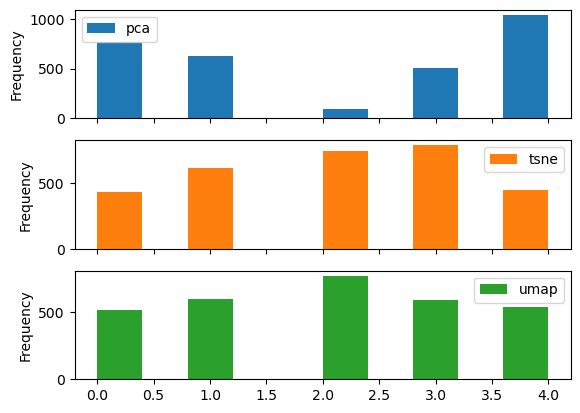

In [794]:
# Wrap in a function to get a sense of what might be best
compare[compare['Unemployment Category'] == 'Average Unemployment'][['pca', 'tsne', 'umap']].plot.hist(subplots=True)
plt.show()

In [795]:
compare[compare['Unemployment Category'] == 'Average Unemployment'].groupby('pca').size()

pca
0     767
1     622
2      95
3     501
4    1039
dtype: int64

In [796]:
tsne_0 = compare[compare['tsne'] == 0]
tsne_0

State/Area  Month  Year  \
24       Arizona    1.0  1998   
25       Arizona    2.0  1998   
26       Arizona    3.0  1998   
27       Arizona    4.0  1998   
28       Arizona    5.0  1998   
...          ...    ...   ...   
14059  Wisconsin    8.0  2020   
14060  Wisconsin    9.0  2020   
14061  Wisconsin   10.0  2020   
14062  Wisconsin   11.0  2020   
14063  Wisconsin   12.0  2020   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
24                                                   4.3     143302.6   
25                                                   4.3     143302.6   
26                                                   4.3     143302.6   
27                                                   4.3     143302.6   
28                                                   4.2     143302.6   
...                                                  ...          ...   
14059                                                6.3     340591.1   
14060                                                5.7     340591.1   
14061                                                5.1     340591.1   
14062                                                4.9     340591.1   
14063                                                4.8     340591.1   

      Unemployment Category  pca  tsne  umap  
24         Low Unemployment    0     0     1  
25         Low Unemployment    0     0     1  
26         Low Unemployment    0     0     1  
27         Low Unemployment    0     0     1  
28         Low Unemployment    0     0     1  
...                     ...  ...   ...   ...  
14059  Average Unemployment    3     0     1  
14060  Average Unemployment    3     0     1  
14061      Low Unemployment    3     0     1  
14062      Low Unemployment    3     0     1  
14063      Low Unemployment    3     0     1  

[2492 rows x 9 columns]

In [293]:
tsne_0.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       500
High Unemployment          342
Low Unemployment          1012
Very High Unemployment     295
Very Low Unemployment     1207
dtype: int64

In [295]:
tsne0_proba = tsne_0.groupby('Unemployment Category').size() / len(tsne_0)
tsne0_proba

Unemployment Category
Average Unemployment      0.148987
High Unemployment         0.101907
Low Unemployment          0.301549
Very High Unemployment    0.087902
Very Low Unemployment     0.359654
dtype: float64

In [314]:
entropy(tsne0_proba, base=len(tsne0_proba))

0.9067810878082265

In [299]:
entropy(tsne0_proba)

1.4594078609967946

In [300]:
clean_compare = compare.dropna()

In [310]:
clean_compare.loc[:,'pca':'umap']

pca  tsne  umap
0        2     2     1
1        2     2     1
2        2     2     1
3        2     2     1
4        1     2     1
...    ...   ...   ...
15295    2     2     3
15296    2     2     3
15297    2     2     3
15298    2     2     3
15299    2     2     3

[15300 rows x 3 columns]

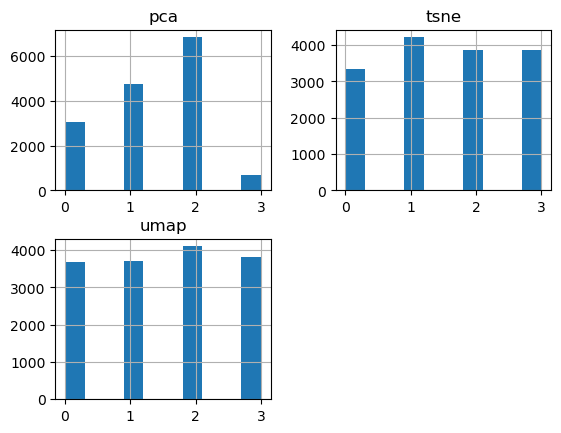

In [311]:
clean_compare.loc[:,'pca':'umap'].hist()
plt.show()

# Analyzing PCA Clusters

In [799]:
pca_0 = compare[compare['pca'] == 0]
pca_1 = compare[compare['pca'] == 1]
pca_2 = compare[compare['pca'] == 2]
pca_3 = compare[compare['pca'] == 3]
pca_4 = compare[compare['pca'] == 4]



In [873]:
# Cluster 0
pca_0.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      767
High Unemployment          29
Low Unemployment         2418
Very Low Unemployment    2610
dtype: int64

In [801]:
pca0_proba = pca_0.groupby('Unemployment Category').size() / len(pca_0)
pca0_proba

Unemployment Category
Average Unemployment     0.131696
High Unemployment        0.004979
Low Unemployment         0.415179
Very Low Unemployment    0.448146
dtype: float64

In [802]:
entropy(pca0_proba)

1.0180449053082699

In [803]:
# PCA Cluster 1
pca_1.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      622
High Unemployment         270
Low Unemployment          761
Very High Unemployment    352
Very Low Unemployment     118
dtype: int64

In [804]:
pca1_proba = pca_1.groupby('Unemployment Category').size() / len(pca_1)
pca1_proba

Unemployment Category
Average Unemployment      0.292982
High Unemployment         0.127179
Low Unemployment          0.358455
Very High Unemployment    0.165803
Very Low Unemployment     0.055582
dtype: float64

In [805]:
entropy(pca1_proba)

1.4482644012022894

In [806]:
pca_1.groupby('Unemployment Category').mean()['Percent (%) of Labor Force Unemployed in State/Area'].mean()

5.992776888711026

In [807]:
# Cluster 2
pca_2.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       95
High Unemployment          69
Low Unemployment          158
Very High Unemployment    126
Very Low Unemployment      25
dtype: int64

In [808]:
pca2_proba = pca_2.groupby('Unemployment Category').size() / len(pca_2)
pca2_proba

Unemployment Category
Average Unemployment      0.200846
High Unemployment         0.145877
Low Unemployment          0.334038
Very High Unemployment    0.266385
Very Low Unemployment     0.052854
dtype: float64

In [809]:
entropy(pca2_proba)

1.4772664569166385

In [810]:
pca_2.groupby('Unemployment Category').mean()['Percent (%) of Labor Force Unemployed in State/Area'].mean()

6.225999665279508

In [811]:
pca_3.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      501
High Unemployment         575
Low Unemployment          484
Very High Unemployment    417
Very Low Unemployment     300
dtype: int64

In [812]:
pca3_proba = pca_3.groupby('Unemployment Category').size() / len(pca_3)
pca3_proba

Unemployment Category
Average Unemployment      0.220026
High Unemployment         0.252525
Low Unemployment          0.212560
Very High Unemployment    0.183136
Very Low Unemployment     0.131752
dtype: float64

In [813]:
entropy(pca3_proba)

1.5877316673637816

In [814]:
pca_3.groupby('Unemployment Category').mean()['Percent (%) of Labor Force Unemployed in State/Area'].mean()

5.92942416769565

In [815]:
pca4_proba = pca_4.groupby('Unemployment Category').size() / len(pca_4)
pca4_proba

Unemployment Category
Average Unemployment      0.307487
High Unemployment         0.225215
Low Unemployment          0.132880
Very High Unemployment    0.313110
Very Low Unemployment     0.021308
dtype: float64

In [816]:
entropy(pca4_proba)

1.4121379167856805

In [817]:
# Average Entropy

print(( entropy(pca1_proba) + entropy(pca2_proba)
       + entropy(pca3_proba) + entropy(pca0_proba) + entropy(pca4_proba))/5 )

1.388689069515332


# Analyzing tSNE Clusters

In [818]:
tsne_0 = compare[compare['tsne'] == 0]
tsne_1 = compare[compare['tsne'] == 1]
tsne_2 = compare[compare['tsne'] == 2]
tsne_3 = compare[compare['tsne'] == 3]
tsne_4 = compare[compare['tsne'] == 4]


In [819]:
tsne_0.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      433
High Unemployment         277
Low Unemployment          801
Very High Unemployment    288
Very Low Unemployment     693
dtype: int64

In [820]:
tsne0_proba = tsne_0.groupby('Unemployment Category').size() / len(tsne_0)
tsne0_proba

Unemployment Category
Average Unemployment      0.173756
High Unemployment         0.111156
Low Unemployment          0.321429
Very High Unemployment    0.115570
Very Low Unemployment     0.278090
dtype: float64

In [821]:
entropy(tsne0_proba)

1.518383692203298

In [822]:
tsne_1.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      617
High Unemployment         506
Low Unemployment          850
Very High Unemployment    358
Very Low Unemployment     629
dtype: int64

In [823]:
tsne1_proba = tsne_1.groupby('Unemployment Category').size() / len(tsne_1)
tsne1_proba

Unemployment Category
Average Unemployment      0.208446
High Unemployment         0.170946
Low Unemployment          0.287162
Very High Unemployment    0.120946
Very Low Unemployment     0.212500
dtype: float64

In [824]:
entropy(tsne1_proba)

1.5717242739847217

In [825]:
tsne_2.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      740
High Unemployment         319
Low Unemployment          813
Very High Unemployment    306
Very Low Unemployment     427
dtype: int64

In [826]:
tsne2_proba = tsne_2.groupby('Unemployment Category').size() / len(tsne_2)
tsne2_proba

Unemployment Category
Average Unemployment      0.284069
High Unemployment         0.122457
Low Unemployment          0.312092
Very High Unemployment    0.117466
Very Low Unemployment     0.163916
dtype: float64

In [827]:
entropy(tsne2_proba)

1.5260803509308585

In [828]:
tsne_3.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      786
High Unemployment         335
Low Unemployment          989
Very High Unemployment    516
Very Low Unemployment     633
dtype: int64

In [829]:
tsne3_proba = tsne_3.groupby('Unemployment Category').size() / len(tsne_3)
tsne3_proba

Unemployment Category
Average Unemployment      0.241178
High Unemployment         0.102792
Low Unemployment          0.303467
Very High Unemployment    0.158331
Very Low Unemployment     0.194231
dtype: float64

In [830]:
entropy(tsne3_proba)

1.5488469494140065

In [831]:
tsne4_proba = tsne_4.groupby('Unemployment Category').size() / len(tsne_4)
tsne4_proba


Unemployment Category
Average Unemployment      0.162319
High Unemployment         0.096739
Low Unemployment          0.296014
Very High Unemployment    0.175725
Very Low Unemployment     0.269203
dtype: float64

In [832]:
entropy(tsne4_proba)

1.5402652073541752

In [833]:
print(( entropy(tsne1_proba) + entropy(tsne2_proba)
       + entropy(tsne3_proba) + entropy(tsne0_proba) + entropy(tsne4_proba))/5 )

1.541060094777412


# Analyzing UMAP Clusters

In [834]:
umap_0 = compare[compare['umap'] == 0]
umap_1 = compare[compare['umap'] == 1]
umap_2 = compare[compare['umap'] == 2]
umap_3 = compare[compare['umap'] == 3]
umap_4 = compare[compare['umap'] == 4]

In [835]:
umap_0.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      517
High Unemployment         312
Low Unemployment          689
Very High Unemployment    351
Very Low Unemployment     553
dtype: int64

In [836]:
umap0_proba = umap_0.groupby('Unemployment Category').size() / len(umap_0)
umap0_proba

Unemployment Category
Average Unemployment      0.213460
High Unemployment         0.128819
Low Unemployment          0.284476
Very High Unemployment    0.144922
Very Low Unemployment     0.228324
dtype: float64

In [837]:
entropy(umap0_proba)

1.5684160852508586

In [838]:
umap_1.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       602
High Unemployment          396
Low Unemployment          1023
Very High Unemployment     418
Very Low Unemployment      788
dtype: int64

In [839]:
umap1_proba = umap_1.groupby('Unemployment Category').size() / len(umap_1)
umap1_proba

Unemployment Category
Average Unemployment      0.186551
High Unemployment         0.122715
Low Unemployment          0.317013
Very High Unemployment    0.129532
Very Low Unemployment     0.244190
dtype: float64

In [840]:
entropy(umap1_proba)

1.5438613718150374

In [841]:
umap_2.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      775
High Unemployment         376
Low Unemployment          815
Very High Unemployment    453
Very Low Unemployment     799
dtype: int64

In [842]:
umap2_proba = umap_2.groupby('Unemployment Category').size() / len(umap_2)
umap2_proba

Unemployment Category
Average Unemployment      0.240833
High Unemployment         0.116843
Low Unemployment          0.253263
Very High Unemployment    0.140771
Very Low Unemployment     0.248291
dtype: float64

In [843]:
entropy(umap2_proba)

1.5634335356114286

In [844]:
umap_3.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      590
High Unemployment         307
Low Unemployment          880
Very High Unemployment    348
Very Low Unemployment     540
dtype: int64

In [845]:
umap3_proba = umap_3.groupby('Unemployment Category').size() / len(umap_3)
umap3_proba

Unemployment Category
Average Unemployment      0.221388
High Unemployment         0.115197
Low Unemployment          0.330206
Very High Unemployment    0.130582
Very Low Unemployment     0.202627
dtype: float64

In [846]:
entropy(umap3_proba)

1.5379557222739701

In [847]:
umap4_proba = umap_4.groupby('Unemployment Category').size() / len(umap_4)
umap4_proba

Unemployment Category
Average Unemployment      0.212264
High Unemployment         0.123035
Low Unemployment          0.339230
Very High Unemployment    0.150550
Very Low Unemployment     0.174921
dtype: float64

In [848]:
entropy(umap4_proba)

1.54354195400965

In [849]:
print(( entropy(umap1_proba) + entropy(umap2_proba)
       + entropy(umap3_proba) + entropy(umap0_proba) + entropy(umap4_proba))/5 )

1.551441733792189


In [850]:
# PCA Clusters have lower entropy on average, so proceeding with those

# Analyzing PCA Clusters Further

In [851]:
# Check to see how much of each category is captured in each cluster

In [874]:
c0 = pca_0.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c0.sort_values(ascending=False)

Unemployment Category
Very Low Unemployment     0.835200
Low Unemployment          0.566276
Average Unemployment      0.253638
High Unemployment         0.017019
Very High Unemployment         NaN
dtype: float64

In [853]:
c1 = pca_1.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c1.sort_values(ascending=False)

Unemployment Category
Average Unemployment      0.205688
Very High Unemployment    0.180236
Low Unemployment          0.178220
High Unemployment         0.158451
Very Low Unemployment     0.037760
dtype: float64

In [854]:
c2 = pca_2.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c2.sort_values(ascending=False)

Unemployment Category
Very High Unemployment    0.064516
High Unemployment         0.040493
Low Unemployment          0.037002
Average Unemployment      0.031415
Very Low Unemployment     0.008000
dtype: float64

In [855]:
c3 = pca_3.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c3.sort_values(ascending=False)

Unemployment Category
High Unemployment         0.337441
Very High Unemployment    0.213518
Average Unemployment      0.165675
Low Unemployment          0.113349
Very Low Unemployment     0.096000
dtype: float64

In [856]:
c4=pca_4.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c4.sort_values(ascending=False)

Unemployment Category
Very High Unemployment    0.541731
High Unemployment         0.446596
Average Unemployment      0.343585
Low Unemployment          0.105152
Very Low Unemployment     0.023040
dtype: float64

In [857]:
t0=c0.to_frame(name='Cluster 0')
t1=c1.to_frame(name='Cluster 1')
t2=c2.to_frame(name='Cluster 2')
t3=c3.to_frame(name='Cluster 3')
t4=c4.to_frame(name='Cluster 4')
clusters = t0.merge(t1,on='Unemployment Category')
clusters = clusters.merge(t2,on='Unemployment Category')
clusters = clusters.merge(t3,on='Unemployment Category')
clusters = clusters.merge(t4,on='Unemployment Category')
clusters

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
Unemployment Category                                                        
Average Unemployment     0.253638   0.205688   0.031415   0.165675   0.343585
High Unemployment        0.017019   0.158451   0.040493   0.337441   0.446596
Low Unemployment         0.566276   0.178220   0.037002   0.113349   0.105152
Very High Unemployment        NaN   0.180236   0.064516   0.213518   0.541731
Very Low Unemployment    0.835200   0.037760   0.008000   0.096000   0.023040

In [858]:
clusters.sort_values(by='Cluster 2',ascending=False)

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
Unemployment Category                                                        
Very High Unemployment        NaN   0.180236   0.064516   0.213518   0.541731
High Unemployment        0.017019   0.158451   0.040493   0.337441   0.446596
Low Unemployment         0.566276   0.178220   0.037002   0.113349   0.105152
Average Unemployment     0.253638   0.205688   0.031415   0.165675   0.343585
Very Low Unemployment    0.835200   0.037760   0.008000   0.096000   0.023040

In [877]:
clusters.loc['Very High Unemployment'].sort_values( ascending=False)

Cluster 4    0.541731
Cluster 3    0.213518
Cluster 1    0.180236
Cluster 2    0.064516
Cluster 0         NaN
Name: Very High Unemployment, dtype: float64

In [878]:
clusters.loc['Average Unemployment'].sort_values( ascending=False)

Cluster 4    0.343585
Cluster 0    0.253638
Cluster 1    0.205688
Cluster 3    0.165675
Cluster 2    0.031415
Name: Average Unemployment, dtype: float64

In [882]:
# These clusters capture most cases of Very High or High Unemployment
(clusters['Cluster 4'] + clusters['Cluster 3']).sort_values(ascending=False)

Unemployment Category
High Unemployment         0.784038
Very High Unemployment    0.755248
Average Unemployment      0.509259
Low Unemployment          0.218501
Very Low Unemployment     0.119040
dtype: float64

In [881]:
# Add Cluster 2 to capture more cases of Very High to Average Unemployment
(clusters['Cluster 4'] + clusters['Cluster 3'] + clusters['Cluster 2']).sort_values(ascending=False)

Unemployment Category
High Unemployment         0.824531
Very High Unemployment    0.819764
Average Unemployment      0.540675
Low Unemployment          0.255504
Very Low Unemployment     0.127040
dtype: float64

In [883]:
# These clusters capture most cases of Very Low or Low Unemployment
(clusters['Cluster 1'] + clusters['Cluster 0']).sort_values(ascending=False)

Unemployment Category
Very Low Unemployment     0.872960
Low Unemployment          0.744496
Average Unemployment      0.459325
High Unemployment         0.175469
Very High Unemployment         NaN
dtype: float64

In [864]:
# Analyzing the respective clusters should give us a good idea of what groups together Low & High Unemployment States

# Analyzing the Clusters

In [875]:
analysis = data
analysis['cluster'] = pca_df['cluster']

In [876]:
analysis

FIPS Code State/Area  Year  Month  \
0              1    Alabama  1998    1.0   
1              1    Alabama  1998    2.0   
2              1    Alabama  1998    3.0   
3              1    Alabama  1998    4.0   
4              1    Alabama  1998    5.0   
...          ...        ...   ...    ...   
14071         56    Wyoming  2020    8.0   
14072         56    Wyoming  2020    9.0   
14073         56    Wyoming  2020   10.0   
14074         56    Wyoming  2020   11.0   
14075         56    Wyoming  2020   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
14071                                           451127.0           
14072                                           451474.0           
14073                                           451850.0           
14074                                           452195.0           
14075                                           452401.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
14071                                  293495.0   
14072                                  293324.0   
14073                                  292624.0   
14074                                  292079.0   
14075                                  291617.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
14071                                    65.1                        275244.0   
14072                                    65.0                        276031.0   
14073                                    64.8                        276292.0   
14074                                    64.6                        276149.0   
14075                                    64.5                        275785.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
14071                                               61.0   
14072                                               61.1   
14073                                               61.1   
14074                                               61.1   
14075                                               61.0   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
14071                           18251.0   
14072     

In [970]:
# | (analysis['cluster'] == 2)
highUnemp = analysis[(analysis['cluster'] == 3) | (analysis['cluster'] == 4 )]
lowUnemp = analysis[(analysis['cluster'] == 1) | (analysis['cluster'] == 0)]

In [971]:
# characteristics of low unemployment states
lowStates = lowUnemp['State/Area'].unique()
print('State GDP: ', round(lowUnemp['State GDP'].mean(),2))
print('State Income per Capita: ',round(lowUnemp['State per Capita Income'].mean(),2))
print('Unemployment Rate: ',round(lowUnemp['Percent (%) of Labor Force Unemployed in State/Area'].mean(),3))
print('Percent Change: ',round(lowUnemp['Percent Change'].mean(),3))
print('Minimum Wage (2020 Dollars): ',round(lowUnemp['Minimum Wage (2020 Dollars)'].mean(),2))

State GDP:  274518.34
State Income per Capita:  38513.04
Unemployment Rate:  4.542
Percent Change:  -0.102
Minimum Wage (2020 Dollars):  7.88


In [972]:
# characteristics of high unemployment states
highStates = highUnemp['State/Area'].unique()
print('State GDP: ',round(highUnemp['State GDP'].mean(),2))
print('State Income per Capita: ',round(highUnemp['State per Capita Income'].mean(),2))
print('Unemployment Rate: ',round(highUnemp['Percent (%) of Labor Force Unemployed in State/Area'].mean(),3))
print('Percent Change: ',round(highUnemp['Percent Change'].mean(),3))
print('Minimum Wage (2020 Dollars): ',round(highUnemp['Minimum Wage (2020 Dollars)'].mean(),2))

State GDP:  189419.89
State Income per Capita:  42736.84
Unemployment Rate:  6.712
Percent Change:  0.402
Minimum Wage (2020 Dollars):  8.68


In [973]:
# low unemployment states not in Average - high unemployment clusters
for state in lowStates:
    if state not in highStates:
        print(state)

Florida
Illinois
New York
Ohio
Pennsylvania
Texas


In [974]:
# high - average unemployment states not in low unemployment list
for state in highStates:
    if state not in lowStates:
        print(state)

Mississippi
West Virginia


In [927]:
highUnemp[highUnemp.Year>=2010]['State GDP'].mean()

434386.05444104027

In [935]:
recent = highUnemp[highUnemp.Year>=2010]
past = lowUnemp[lowUnemp.Year<2010]


In [954]:
recent[recent['State/Area']=='South Carolina']

Empty DataFrame
Columns: [FIPS Code, State/Area, Year, Month, Total Civilian Non-Institutional Population in State/Area, Total Civilian Labor Force in State/Area, Percent (%) of State/Area's Population, Total Employment in State/Area, Percent (%) of Labor Force Employed in State/Area, Total Unemployment in State/Area, Percent (%) of Labor Force Unemployed in State/Area, Unemployment Category, State per Capita Income, State per Capita Disposable Income, State GDP, Percent Unemployment Average, Percent Change, Minimum Wage (2020 Dollars), cluster]
Index: []

In [955]:
past[past['State/Area']=='South Carolina']

FIPS Code      State/Area  Year  Month  \
480          45  South Carolina  1998    1.0   
481          45  South Carolina  1998    2.0   
482          45  South Carolina  1998    3.0   
483          45  South Carolina  1998    4.0   
484          45  South Carolina  1998    5.0   
485          45  South Carolina  1998    6.0   
486          45  South Carolina  1998    7.0   
487          45  South Carolina  1998    8.0   
488          45  South Carolina  1998    9.0   
489          45  South Carolina  1998   10.0   
490          45  South Carolina  1998   11.0   
491          45  South Carolina  1998   12.0   
1092         45  South Carolina  1999    1.0   
1093         45  South Carolina  1999    2.0   
1094         45  South Carolina  1999    3.0   
1095         45  South Carolina  1999    4.0   
1096         45  South Carolina  1999    5.0   
1097         45  South Carolina  1999    6.0   
1098         45  South Carolina  1999    7.0   
1099         45  South Carolina  1999    8.0   
1100         45  South Carolina  1999    9.0   
1101         45  South Carolina  1999   10.0   
1102         45  South Carolina  1999   11.0   
1103         45  South Carolina  1999   12.0   
1704         45  South Carolina  2000    1.0   
1705         45  South Carolina  2000    2.0   
1706         45  South Carolina  2000    3.0   
1707         45  South Carolina  2000    4.0   
1708         45  South Carolina  2000    5.0   
1709         45  South Carolina  2000    6.0   
1710         45  South Carolina  2000    7.0   
1711         45  South Carolina  2000    8.0   
1712         45  South Carolina  2000    9.0   
1713         45  South Carolina  2000   10.0   
1714         45  South Carolina  2000   11.0   
1715         45  South Carolina  2000   12.0   
2316         45  South Carolina  2001    1.0   
2317         45  South Carolina  2001    2.0   

      Total Civilian Non-Institutional Population in State/Area  \
480                                           2924863.0           
481                                           2927841.0           
482                                           2931819.0           
483                                           2935797.0           
484                                           2939775.0           
485                                           2943753.0           
486                                           2947731.0           
487                                           2951709.0           
488                                           2955686.0           
489                                           2959664.0           
490                                           2963642.0           
491                                           2967620.0           
1092                                          2970598.0           
1093                                          2973576.0           
1094                                          2976554.0           
1095                                          2980532.0           
1096                                          2984510.0           
1097                                          2987488.0           
1098                                          2991466.0           
1099                                          2995444.0           
1100                                          2998422.0           
1101                                          3002400.0           
1102                                          3005378.0           
1103                                          3008356.0           
1704                                          3012334.0           
1705                                          3014312.0           
1706                                          3017290.0           
1707                                          3017672.0           
1708                                          3021153.0           
1709                                          3024788.0           
1710                                          3028366.0 

In [949]:
[p]

0    2000
Name: Year, dtype: int64